In [205]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras.layers import Convolution1D
from keras import initializers, regularizers, constraints, optimizers, layers

In [206]:
#Loading the dataset

from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000) #top 10,000 most frequently occurring words in the training data.

#each review is a list of word indices (encoding a sequence of words).

In [207]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [208]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))        
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.                          
    return results

x_train = vectorize_sequences(train_data)                  
x_test = vectorize_sequences(test_data)           

In [209]:
x_train.shape

(25000, 10000)

In [210]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [211]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
# model.add(layers.Dense(32, activation='relu'))
# model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [212]:
from keras import losses
from keras import metrics
from tensorflow.keras import optimizers


model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])


In [213]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [214]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

# model = models.Sequential()
# model.add(layers.Dense(16, activation='relu', input_shape=(12000,)))
# model.add(layers.Dense(16, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))

# model.compile(optimizer='rmsprop',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
30/30 [==============================] - 1s 33ms/step - loss: 0.4746 - acc: 0.7905 - val_loss: 0.3429 - val_acc: 0.8786
Epoch 2/4
30/30 [==============================] - 1s 24ms/step - loss: 0.2736 - acc: 0.9105 - val_loss: 0.3184 - val_acc: 0.8738
Epoch 3/4
30/30 [==============================] - 1s 23ms/step - loss: 0.2096 - acc: 0.9330 - val_loss: 0.2922 - val_acc: 0.8828
Epoch 4/4
30/30 [==============================] - 1s 23ms/step - loss: 0.1708 - acc: 0.9453 - val_loss: 0.2867 - val_acc: 0.8833
Epoch 1/4
49/49 [==============================] - 1s 18ms/step - loss: 0.1983 - acc: 0.9260
Epoch 2/4
49/49 [==============================] - 1s 18ms/step - loss: 0.1644 - acc: 0.9424
Epoch 3/4
49/49 [==============================] - 1s 17ms/step - loss: 0.1417 - acc: 0.9516
Epoch 4/4
49/49 [==============================] - 1s 18ms/step - loss: 0.1286 - acc: 0.9556


In [215]:
history_dict = history.history

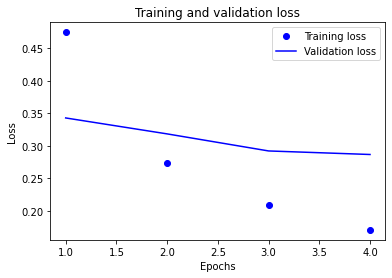

In [216]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')           
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')      
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

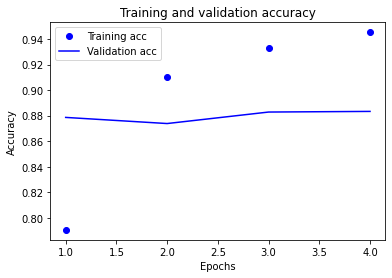

In [217]:
plt.clf()                                      
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [218]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
# model.add(layers.Dense(32, activation='relu'))
# model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)


Epoch 1/4
49/49 [==============================] - 1s 18ms/step - loss: 0.4116 - accuracy: 0.8323
Epoch 2/4
49/49 [==============================] - 1s 17ms/step - loss: 0.2481 - accuracy: 0.9112
Epoch 3/4
49/49 [==============================] - 1s 18ms/step - loss: 0.1973 - accuracy: 0.9303
Epoch 4/4
49/49 [==============================] - 1s 18ms/step - loss: 0.1686 - accuracy: 0.9419


In [219]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.2890 - accuracy: 0.8858


In [220]:
model.predict(x_test)

array([[0.18622202],
       [0.9998919 ],
       [0.78821576],
       ...,
       [0.12147123],
       [0.08040881],
       [0.5990073 ]], dtype=float32)

In [221]:
# output = relu(dot(W, input) + b)
